# Omar Alkhuwattime 440013412 sec:171 

## Import Libraries

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 
import re

# corpus preprocessing

In [7]:
tokenizer = Tokenizer()
data = open('ba15.txt',encoding='utf-8').read() # it will raed the corpus

corpus = re.sub(r'[^\u0621-\u064A ]+', ' ', data)  # Remove diacritics and non-arabic characters 
corpus = corpus.split('\n') # Split the corpus into lines


{'من': 1, 'في': 2, 'ما': 3, 'إذا': 4, 'لا': 5, 'أن': 6, 'على': 7, 'ولا': 8, 'إن': 9, 'لم': 10, 'الله': 11, 'يا': 12, 'إلى': 13, 'عن': 14, 'لي': 15, 'أو': 16, 'حتى': 17, 'به': 18, 'قد': 19, 'غير': 20, 'كنت': 21, 'وقد': 22, 'كان': 23, 'له': 24, 'أم': 25, 'لها': 26, 'بعد': 27, 'الذي': 28, 'ألا': 29, 'الناس': 30, 'كل': 31, 'ليس': 32, 'فما': 33, 'بها': 34, 'إلا': 35, 'يوم': 36, 'ترى': 37, 'ولم': 38, 'بن': 39, 'عليه': 40, 'لو': 41, 'ومن': 42, 'حين': 43, 'وما': 44, 'لما': 45, 'يوما': 46, 'ذا': 47, 'بين': 48, 'ثم': 49, 'فيها': 50, 'يكن': 51, 'فيه': 52, 'علي': 53, 'هل': 54, 'إذ': 55, 'وان': 56, 'أنت': 57, 'ابن': 58, 'عند': 59, 'كأن': 60, 'بي': 61, 'الدهر': 62, 'وليس': 63, 'فقد': 64, 'خير': 65, 'أما': 66, 'وأن': 67, 'منها': 68, 'قبل': 69, 'نفسي': 70, 'فقلت': 71, 'العين': 72, 'وأنت': 73, 'إني': 74, 'ذي': 75, 'الليل': 76, 'وفي': 77, 'منك': 78, 'منهم': 79, 'ذاك': 80, 'القوم': 81, 'ولقد': 82, 'قوم': 83, 'الفتى': 84, 'بك': 85, 'عليك': 86, 'بني': 87, 'ولكن': 88, 'ألم': 89, 'منه': 90, 'مني': 91, 'ليلى'

# fitting

In [9]:
tokenizer.fit_on_texts(corpus) # This will assign an unique index to each word in the corpus
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index) # the word and it's index
print(total_words)

{'من': 1, 'في': 2, 'ما': 3, 'إذا': 4, 'لا': 5, 'أن': 6, 'على': 7, 'ولا': 8, 'إن': 9, 'لم': 10, 'الله': 11, 'يا': 12, 'إلى': 13, 'عن': 14, 'لي': 15, 'أو': 16, 'حتى': 17, 'به': 18, 'قد': 19, 'غير': 20, 'كنت': 21, 'وقد': 22, 'كان': 23, 'له': 24, 'أم': 25, 'لها': 26, 'بعد': 27, 'الذي': 28, 'ألا': 29, 'الناس': 30, 'كل': 31, 'ليس': 32, 'فما': 33, 'بها': 34, 'إلا': 35, 'يوم': 36, 'ترى': 37, 'ولم': 38, 'بن': 39, 'عليه': 40, 'لو': 41, 'ومن': 42, 'حين': 43, 'وما': 44, 'لما': 45, 'يوما': 46, 'ذا': 47, 'بين': 48, 'ثم': 49, 'فيها': 50, 'يكن': 51, 'فيه': 52, 'علي': 53, 'هل': 54, 'إذ': 55, 'وان': 56, 'أنت': 57, 'ابن': 58, 'عند': 59, 'كأن': 60, 'بي': 61, 'الدهر': 62, 'وليس': 63, 'فقد': 64, 'خير': 65, 'أما': 66, 'وأن': 67, 'منها': 68, 'قبل': 69, 'نفسي': 70, 'فقلت': 71, 'العين': 72, 'وأنت': 73, 'إني': 74, 'ذي': 75, 'الليل': 76, 'وفي': 77, 'منك': 78, 'منهم': 79, 'ذاك': 80, 'القوم': 81, 'ولقد': 82, 'قوم': 83, 'الفتى': 84, 'بك': 85, 'عليك': 86, 'بني': 87, 'ولكن': 88, 'ألم': 89, 'منه': 90, 'مني': 91, 'ليلى'

In [10]:
# This initializes an empty list input_sequences that will be used to store the generated n-grams
input_sequences = [] 
# This loops through each line in the corpus
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0] # This converts the current line of text to a sequence of integers
	for i in range(1, len(token_list)): # This loops through each index i in the range from 1 to the length of the token_list
		n_gram_sequence = token_list[:i+1] # This slices the token_list to create an n-gram sequence of length i+1
		input_sequences.append(n_gram_sequence) # This appends the n_gram_sequence to the input_sequences list

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences]) # it will get the lengthe of the longest n-gram sequences in input_sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')) # This pads the n-gram sequences in input_sequences with zeros so that it has the same length as the max_sequence_len and converts them to a NumPy array

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1] # splits the input_sequences array into two parts: where xs will contain all the sequence except the last one and labels will contain only the last one

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) # converts the labels array of integer target values to a one-hot encoded representation

In [11]:
print(xs[5])
print(ys[5])

[  0   0   0 ... 390 879 880]
[0. 0. 0. ... 0. 0. 0.]


# Training the model 

In [10]:
model = Sequential() # Create a sequential model
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) # Add an embedding layer to the model with the specified maximum number of words and embedding dimension
model.add(Bidirectional(LSTM(150))) # adds a bidirectional LSTM layer to the model
model.add(Dense(total_words, activation='sigmoid')) # adds a Dense layer to the model
adam = Adam(lr=0.01) # This creates an instance of the Adam optimizer with a learning rate of 0.01 
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) # This compiles the model with a categorical cross-entropy loss function, the Adam optimizer with a given learning rate and the accuracy metric
history = model.fit(xs, ys, epochs=10, verbose=1) # trains the neural network model on the input data xs and target data ys for 10 epochs with a verbosity level of 1, and returns a history object that contains the training metrics
print(model)
model.save("./model.h5") # This will save the model into model.h5 file

Epoch 1/10
275/275 [==============================] - 460s 2s/step - loss: 9.7816 - accuracy: 0.0142
Epoch 2/10
275/275 [==============================] - 457s 2s/step - loss: 8.8004 - accuracy: 0.0208
Epoch 3/10
275/275 [==============================] - 468s 2s/step - loss: 7.8504 - accuracy: 0.0267
Epoch 4/10
275/275 [==============================] - 552s 2s/step - loss: 5.7398 - accuracy: 0.0732
Epoch 5/10
275/275 [==============================] - 535s 2s/step - loss: 3.2592 - accuracy: 0.2963
Epoch 6/10
275/275 [==============================] - 526s 2s/step - loss: 1.4329 - accuracy: 0.6591
Epoch 7/10
275/275 [==============================] - 456s 2s/step - loss: 0.5410 - accuracy: 0.8707
Epoch 8/10
275/275 [==============================] - 457s 2s/step - loss: 0.1824 - accuracy: 0.9610
Epoch 9/10
275/275 [==============================] - 454s 2s/step - loss: 0.0675 - accuracy: 0.9876
Epoch 10/10
275/275 [==============================] - 455s 2s/step - loss: 0.0238 - accura

## the accuracy graph

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

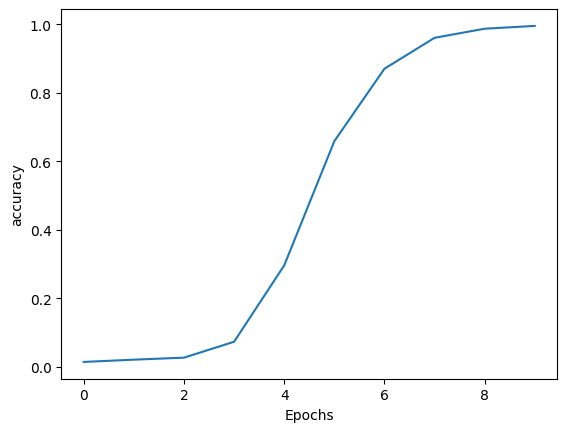

In [12]:
plot_graphs(history, 'accuracy')

# Results 

In [25]:
model = tf.keras.models.load_model("./model.h5") # this line is so you don't have to train the model
seed_text = "ولم يلهه عنك السلو وإنما"
next_words = 10
  
for _ in range(next_words): # This sets up a loop to generate next_words number of words after the seed text
	token_list = tokenizer.texts_to_sequences([seed_text])[0] # This converts the seed_text into a sequence of integers using the tokenizer object
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre') # This pads the token_list sequence with zeros so that it has the same length as the max_sequence_len used during training
	predicted = np.argmax(model.predict(token_list), axis=-1) # This generates a probability distribution over the vocabulary for the next word in the sequence, given the current token_list sequence as input to the model
 
	# This maps the predicted integer index back to the corresponding word in the vocabulary using the word_index attribute of the tokenizer
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	# This appends the output_word to the end of the seed_text, which is used as the input for the next iteration of the loop
	seed_text += " " + output_word 
print(seed_text)

1/1 [==============================] - 1s 933ms/step
ولم يلهه عنك السلو وإنما العرف بالربابات لا تك في كل غوى منهمك ولا تكونن
